## Table of Contents
1. [Introduction](#introduction) 📚
2. [Data Preparation](#data-preparation) 🧹
3. [Exploratory Data Analysis](#exploratory-data-analysis) 🔍
4. [Feature Engineering](#feature-engineering) 🔧
5. [Model Building](#model-building) 🧠
6. [Model Evaluation](#model-evaluation) 📝
7. [Conclusion](#conclusion) 🏁

---

## Introduction 📚
Provide a brief introduction to the problem statement and the dataset you'll be working with. 

---

## Data Preparation 🧹
Perform necessary data cleaning, preprocessing, and feature selection. 

---

## Exploratory Data Analysis 🔍
Explore the dataset to gain insights and visualize the data. 

---

## Feature Engineering 🔧
Create new features or transform existing features to improve model performance. 

---

## Model Building 🧠
Build and train machine learning models on the prepared dataset. 

---

## Model Evaluation 📝
Evaluate the performance of the trained models using appropriate metrics. 

---

## Conclusion 🏁
Summarize the findings, discuss the limitations, and suggest future improvements. 

---

<center>
![Funny GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbTNzYzFmZGYyZ2JwbHljd3Q1ZXRhcXQ5a3Vxc3cwdms1M3F4NTZ1aCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l0Iyh8uNCOfXWzWG4/giphy.gif)
<h2>Title of the GIF</h2>
</center>




In [4]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# warnings.filterwarnings("ignore")
# pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('dark_background')
from sklearn.preprocessing import LabelEncoder

In [27]:
# Print the head of the dataset as well as the datatypes
df=pd.read_csv("./data/heart.csv")
print(df.head())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [19]:
null_values = df.isnull().sum()
print(null_values)


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [24]:
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found in the data.")
    print(df[duplicates])
    df = df.drop_duplicates()
    print("Duplicates removed from the data.")
    print(df.shape)
else:
    print("No duplicates found in the data.")


No duplicates found in the data.


One of the first steps is to look for corrolated values, this is going to help us to understand the data and to see if there are any values that are not important for the model.

(302, 14)


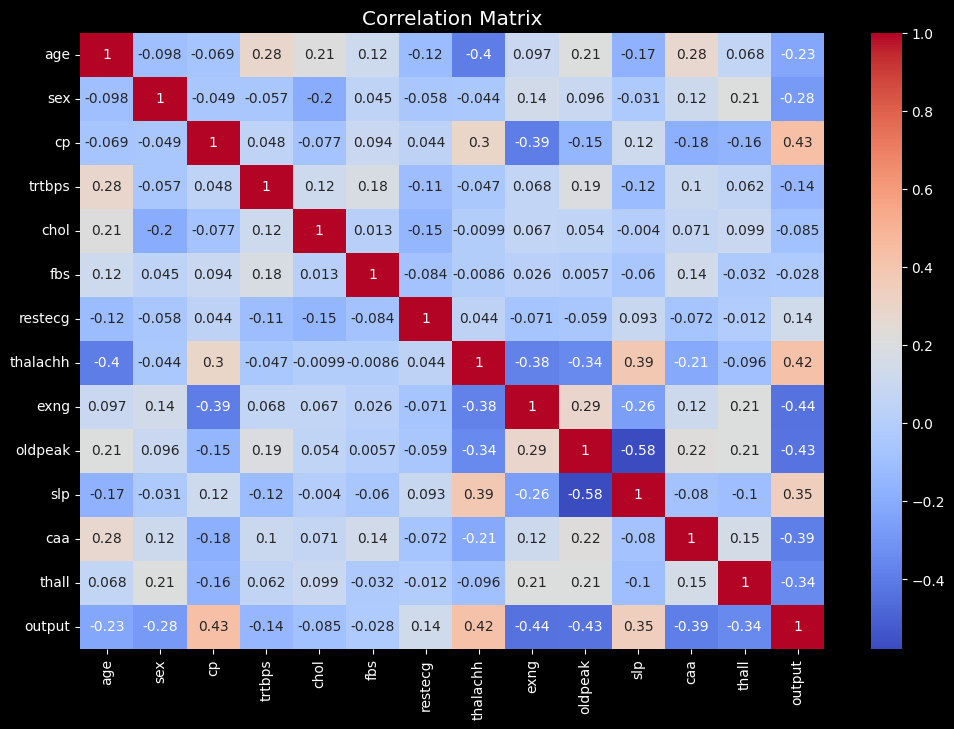

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



there is a couple things you can do to handle highly corrolated values, and it usually dpends on the context, domain and objective. In our case we are just going to drop them for now.

     output  slp
0         1    0
1         1    0
2         1    2
3         1    2
4         1    2
..      ...  ...
298       0    1
299       0    1
300       0    1
301       0    1
302       0    1

[303 rows x 2 columns]


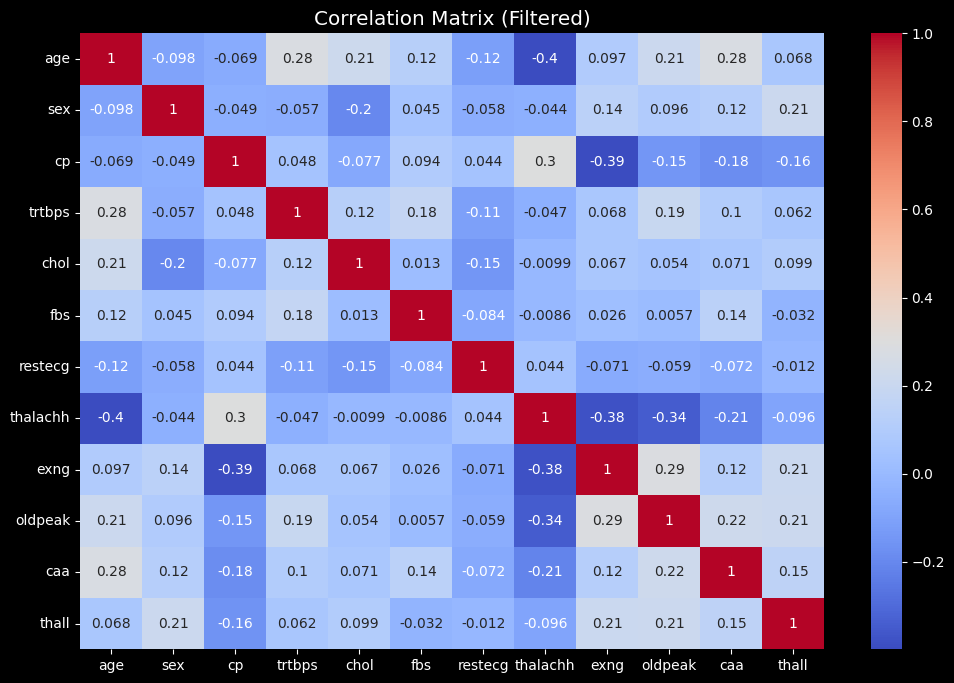

In [69]:
# Remove correlated variables
correlated_features = set()
threshold = 0.4

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_filtered = df.drop(correlated_features, axis=1)

#Print the values that will be dropped
dropped_values = df.columns.difference(df_filtered.columns)
print(df[dropped_values])


# Print the resulting data with correlated values removed
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Filtered)')
plt.show()


This dataset does not contain null values. Ideally we would have to handle null values by imputing them with the mean or median of the column. But since this dataset does not contain any null values, we can skip this step.

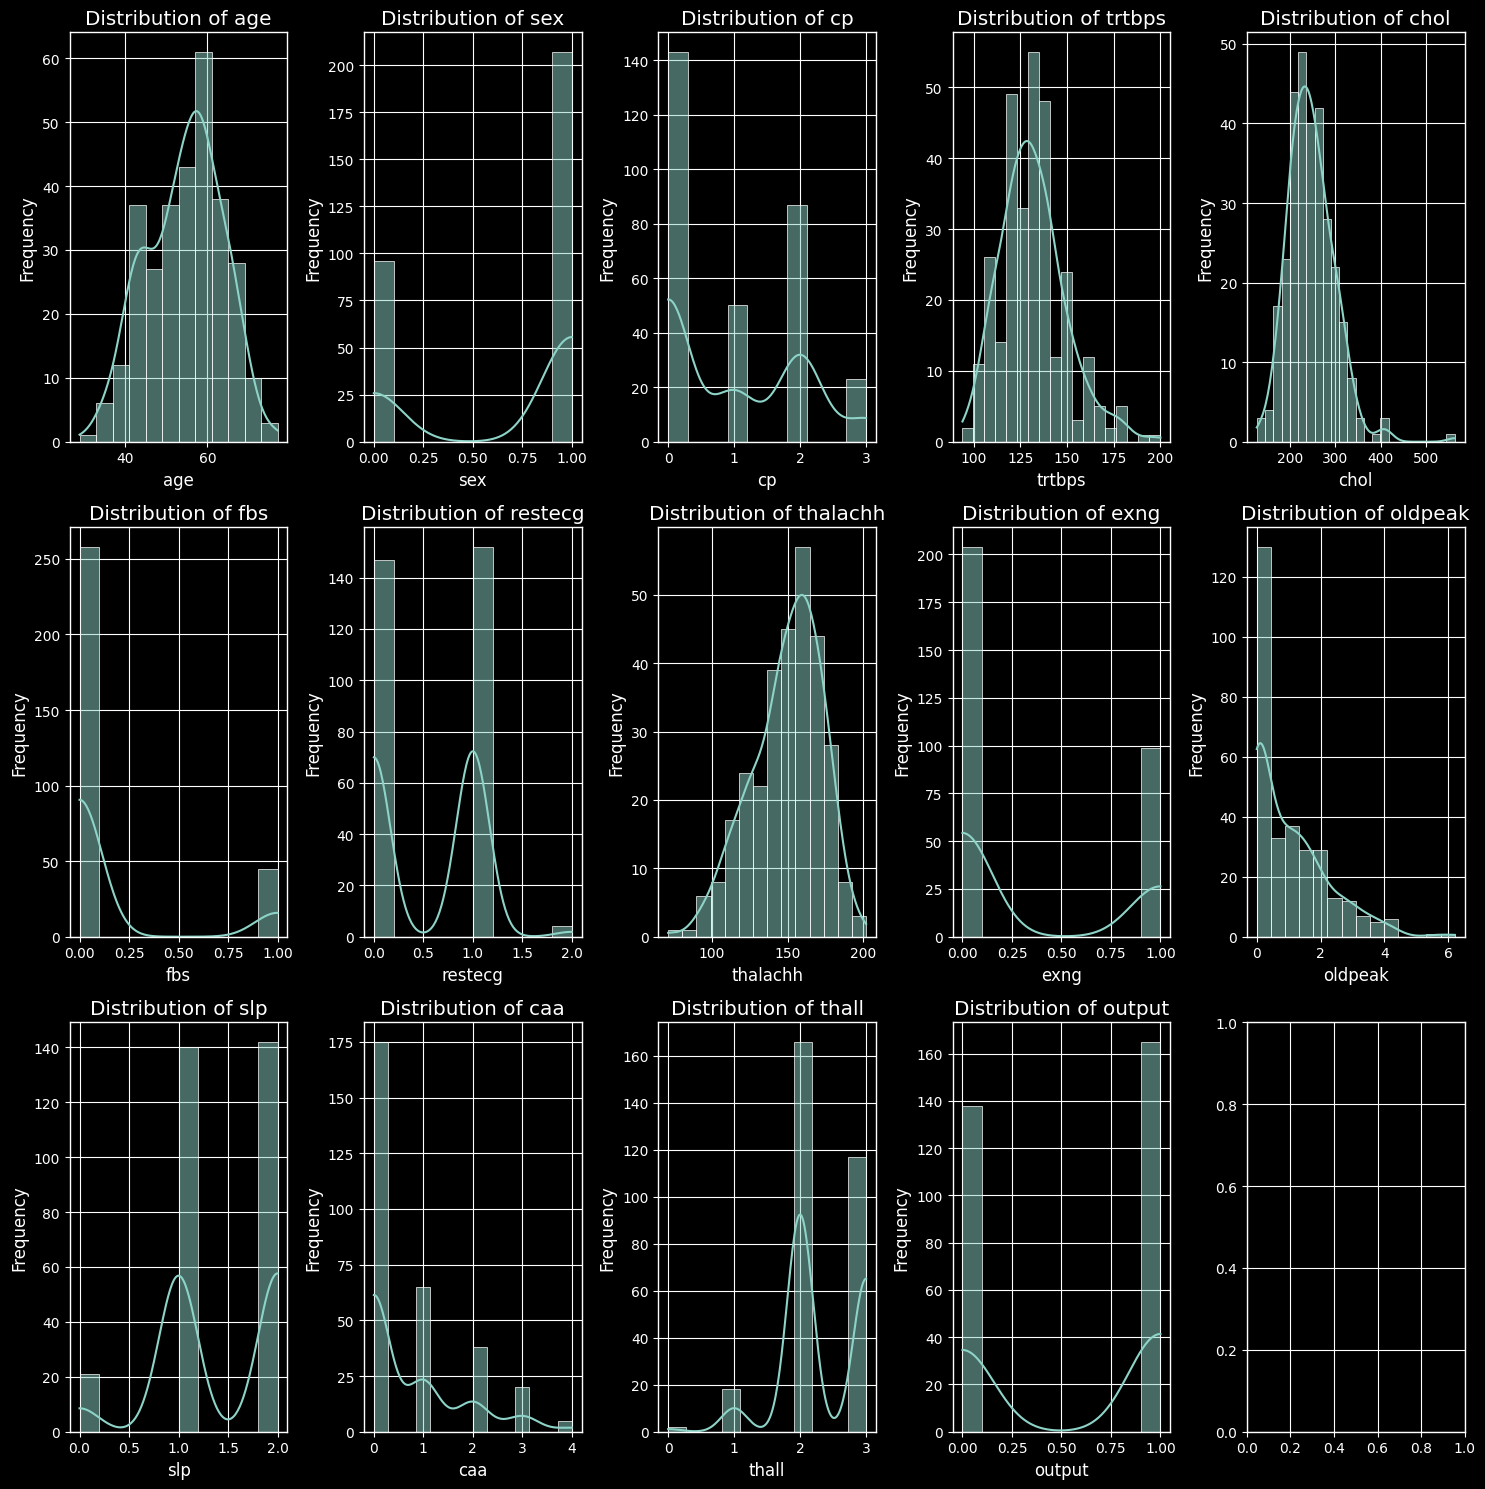

In [72]:
# Create a 3x5 grid for subplots
fig, axes = plt.subplots(3, 5, figsize=(15, 15))

# Iterate over each column in the dataset
for i, column in enumerate(df.columns):
    # Calculate the row and column index for the subplot
    row = i // 5
    col = i % 5
    
    # Plot the distribution of the column
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
# Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display the normalized data
print("Normalized Data:")
print(df_normalized)

# Display the non-normalized data
print("\nNon-Normalized Data:")
print(df)


Normalized Data:
          age  sex        cp    trtbps      chol  fbs  restecg  thalachh  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exng   oldpeak  slp   caa     thall  output  
0     0.0  0.370968

In [80]:
# Apply label encoding to the normalized data
label_encoder = LabelEncoder()
df_encoded = df_normalized.apply(label_encoder.fit_transform)

# Display the encoded data
print(df_encoded)


     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     29    1   3      31    64    1        0        49     0       22    0   
1      3    1   2      22    80    0        1        84     0       32    0   
2      7    0   1      22    35    0        0        71     0       14    2   
3     22    1   1      14    67    0        1        76     0        8    2   
4     23    0   0      14   145    0        1        62     1        6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   23    0   0      28    71    0        1        23     1        2    1   
299   11    1   3       8    93    0        1        32     0       12    1   
300   34    1   0      30    26    1        1        40     0       31    1   
301   23    1   0      22     1    0        1        16     1       12    1   
302   23    0   1      22    67    0        0        73     0        0    1   

     caa  thall  output  
0      0      1       1  

In [87]:
feature_col_nontree=df_encoded.columns.to_list()
feature_col_nontree.remove('output')
print(feature_col_nontree)

y=df_encoded["output"].values


['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [88]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_encoded,y=y)):
    
    X_train=df_encoded.loc[trn_,feature_col_nontree]
    y_train=df_encoded.loc[trn_,"output"]
    
    X_valid=df_encoded.loc[val_,feature_col_nontree]
    y_valid=df_encoded.loc[val_,"output"]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

The accuracy for Fold 1 : 0.8446969696969697
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

The accuracy for Fold 2 : 0.8501082251082251
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                       